In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [145]:
df=pd.read_csv('Data.csv',sep=';')

In [146]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,total_work,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,19876.0,1108.0,7080,98,0.0,0,No,59,0.940725
1,01/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,21791.0,NaN,960,0,0.0,0,No,8,0.886500
2,01/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,5513.0,968.0,3660,50,0.0,0,No,31,0.800570
3,01/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,23582.0,968.0,3660,50,0.0,0,No,31,0.800570
4,01/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,NaN,1170.0,1920,50,0.0,0,No,56,0.800382


In [147]:
df.size

19152

In [148]:
df.shape

(1197, 16)

In [149]:
df.nunique()

date                       59
quarter                     5
department                  2
day                         6
team                       12
targeted_productivity       8
smv                        70
total_work               1146
wip                       548
over_time                 141
incentive                  48
idle_time                  12
idle_men                   10
no_of_style_change          2
no_of_workers              51
actual_productivity       879
dtype: int64

In [150]:
df.dtypes #overtime is classified as object

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
total_work               float64
wip                      float64
over_time                 object
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change        object
no_of_workers              int64
actual_productivity      float64
dtype: object

In [151]:
df['over_time'].unique()

array(['7080', '960', '3660', '1920', '6720', '6900', '6000', '6480',
       '2160', 'a', '7200', '1440', '6600', '5640', 'c', '6300', '6540',
       nan, '13800', '1560', '6975', '7020', '6780', '4260', '6660',
       '4320', '6960', '2400', '3840', '4800', '4440', '1800', '2700',
       '10620', '10350', '9900', '5310', '10170', '4470', '10530',
       '10440', '5490', '5670', '9720', '12600', '10050', '15120',
       '14640', '900', '25920', '10260', '2760', '4710', '9540', '7680',
       '3600', '6420', '7980', '3240', '8220', '6930', '8460', '7350',
       '5400', '1620', '2970', '7320', '5100', '3390', '1260', '3420',
       '8970', '10080', '9810', '6570', '5040', '4380', '3630', '8280',
       '6120', '5580', '3720', '5760', '7470', '10500', '6360', '4140',
       '12180', '9000', '15000', '10770', '9360', '3060', '2520', '720',
       '3780', '10320', '6840', '1080', '1200', '4080', '240', '5880',
       '6240', '4200', 'b', '3960', '2280', '5940', '1320', '5460',
       '2040

In [152]:
cond = df['over_time'].str.contains('[a-z]')
lst = []

for i in range(0, df.shape[0]): 
  if cond[i] == True:
    lst.append(i)



In [153]:
lst #list shows the index at which alphabets are present

[16, 22, 390, 454, 530, 680, 808, 919]

In [154]:
df.head(20) #we can confirm by looking at the 16th row

,date,quarter,department,day,team,targeted_productivity,smv,total_work,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,19876.0,1108.0,7080,98,0.0,0,No,59,0.940725
1,01/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,21791.0,NaN,960,0,0.0,0,No,8,0.886500
2,01/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,5513.0,968.0,3660,50,0.0,0,No,31,0.800570
3,01/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,23582.0,968.0,3660,50,0.0,0,No,31,0.800570
4,01/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,NaN,1170.0,1920,50,0.0,0,No,56,0.800382
5,01/01/2015,Quarter1,sweing,Thursday,7,0.80,25.90,NaN,984.0,6720,38,0.0,0,No,56,0.800125
6,01/01/2015,Quarter1,finishing,Thursday,2,0.75,3.94,12643.0,NaN,960,0,0.0,0,No,8,0.755167
7,01/01/2015,Quarter1,sweing,Thursday,3,0.75,28.08,12035.0,795.0,6900,45,0.0,0,No,58,0.753683
8,01/01/2015,Quarter1,sweing,Thursday,2,0.75,19.87,8278.0,733.0,6000,34,0.0,0,No,55,0.753098
9,01/01/2015,Quarter1,sweing,Thursday,1,0.75,28.08,9318.0,681.0,6900,45,0.0,0,No,58,0.750428


In [155]:
df.drop(lst, axis=0, inplace= True)

In [156]:
df.head(20)

,date,quarter,department,day,team,targeted_productivity,smv,total_work,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,19876.0,1108.0,7080,98,0.0,0,No,59,0.940725
1,01/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,21791.0,NaN,960,0,0.0,0,No,8,0.886500
2,01/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,5513.0,968.0,3660,50,0.0,0,No,31,0.800570
3,01/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,23582.0,968.0,3660,50,0.0,0,No,31,0.800570
4,01/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,NaN,1170.0,1920,50,0.0,0,No,56,0.800382
5,01/01/2015,Quarter1,sweing,Thursday,7,0.80,25.90,NaN,984.0,6720,38,0.0,0,No,56,0.800125
6,01/01/2015,Quarter1,finishing,Thursday,2,0.75,3.94,12643.0,NaN,960,0,0.0,0,No,8,0.755167
7,01/01/2015,Quarter1,sweing,Thursday,3,0.75,28.08,12035.0,795.0,6900,45,0.0,0,No,58,0.753683
8,01/01/2015,Quarter1,sweing,Thursday,2,0.75,19.87,8278.0,733.0,6000,34,0.0,0,No,55,0.753098
9,01/01/2015,Quarter1,sweing,Thursday,1,0.75,28.08,9318.0,681.0,6900,45,0.0,0,No,58,0.750428


# **EDA**

In [157]:
df.describe()

,team,targeted_productivity,smv,total_work,wip,incentive,idle_time,idle_men,no_of_workers,actual_productivity
count,1189.000000,695.000000,1189.000000,1159.000000,688.000000,1189.00000,1189.000000,1189.000000,1189.000000,1189.000000
mean,6.422204,0.735612,15.103423,13163.078516,1189.373547,38.39529,0.735071,0.371741,34.737595,0.735347
std,3.463136,0.093762,10.954751,7291.904668,1841.236654,160.69581,12.752337,3.279835,22.251662,0.174332
min,1.000000,0.350000,2.900000,12.000000,7.000000,0.00000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,6491.000000,772.750000,0.00000,0.000000,0.000000,9.000000,0.650417
50%,6.000000,0.750000,15.260000,13469.000000,1039.000000,0.00000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,19752.000000,1250.250000,50.00000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,24979.000000,23122.000000,3600.00000,300.000000,45.000000,89.000000,1.120437


In [158]:
df.describe(include='object')

,date,quarter,department,day,over_time,no_of_style_change
count,1189,1189,1171,1189,1159,1189
unique,59,5,2,6,138,2
top,03/11/2015,Quarter1,sweing,Wednesday,960,No
freq,24,358,676,208,126,722


# **Missing value treatment**

In [159]:
df.isnull().sum()

date                       0
quarter                    0
department                18
day                        0
team                       0
targeted_productivity    494
smv                        0
total_work                30
wip                      501
over_time                 30
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [160]:
df['department']=df['department'].fillna(df['department'].mode()[0])
df['targeted_productivity']=df['targeted_productivity'].fillna(df['targeted_productivity'].median())
df['wip']=df['wip'].fillna(df['wip'].median())
df['over_time']=df['over_time'].fillna(df['over_time'].median())
df['total_work']=df['total_work'].fillna(df['total_work'].median())

In [161]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
total_work               0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [162]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
total_work               float64
wip                      float64
over_time                 object
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change        object
no_of_workers              int64
actual_productivity      float64
dtype: object

In [163]:
df['over_time']=df['over_time'].astype(int)

In [164]:
df['over_time'].dtypes #its converted to int

dtype('int64')

# **Outlier Check**

In [165]:
n_total = df.shape[0]
cols = ['targeted_productivity', 'smv', 'total_work', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers']

df_out = pd.DataFrame(columns = ['Selected_Column', 'No_of_Outliers', 'No_of_Values', 'Outlier_Proportion'])

for col in cols:
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    temp = df[(df[col] < lower_bound) | (df[col]> upper_bound)]
    n_outliers = temp.shape[0]
    outlier_prop = (n_outliers/n_total)*100
    df_out = df_out.append({'Selected_Column': col, 'No_of_Outliers': n_outliers, 'No_of_Values': n_total, 'Outlier_Proportion': outlier_prop}, ignore_index = True)

display(df_out)

,Selected_Column,No_of_Outliers,No_of_Values,Outlier_Proportion
0,targeted_productivity,105,1189,8.830950
1,smv,0,1189,0.000000
2,total_work,0,1189,0.000000
3,wip,356,1189,29.941127
4,over_time,2,1189,0.168209
5,incentive,11,1189,0.925147
6,idle_time,18,1189,1.513877
7,idle_men,18,1189,1.513877
8,no_of_workers,0,1189,0.000000


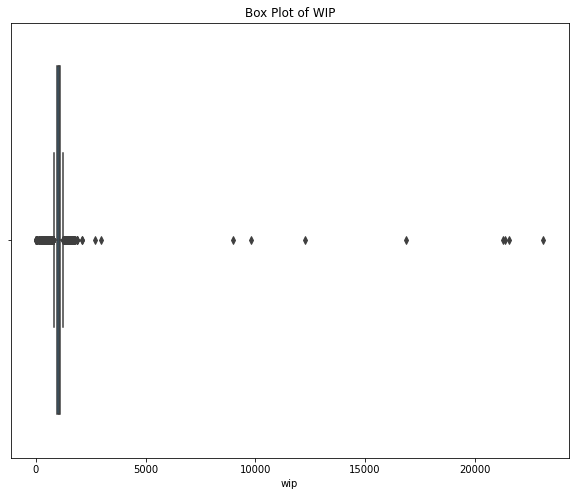

In [166]:
plt.rcParams["figure.figsize"] = (10,8)
sns.boxplot(df['wip'])
plt.title('Box Plot of WIP')
plt.show()


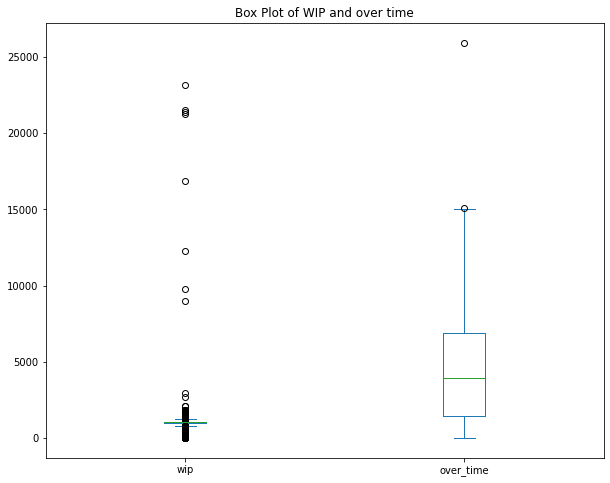

In [167]:
df[['wip','over_time']].plot(kind='box')
plt.title('Box Plot of WIP and over time')
plt.show()

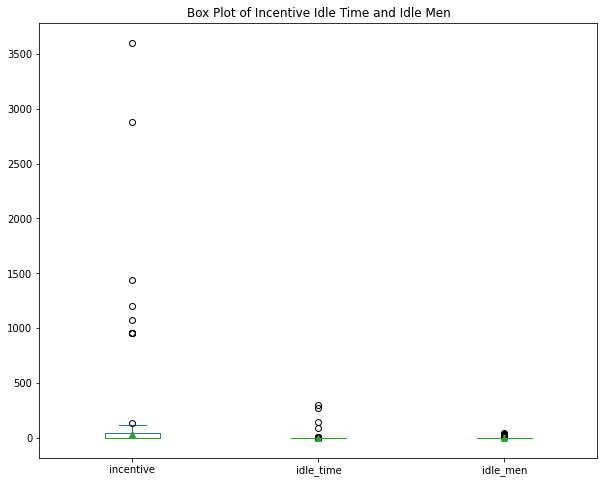

In [168]:
df[['incentive', 'idle_time', 'idle_men']].plot(kind='box', showmeans=True)
plt.title('Box Plot of Incentive Idle Time and Idle Men')
plt.show()

# **Outlier Treatment**

In [169]:
cols = ['targeted_productivity', 'over_time', 'wip', 'incentive', 'idle_time', 'idle_men']

upp_bound = []
low_bound = []
for col in cols:
  q1, q3 = np.percentile(df[col], [25, 75])
  iqr = q3-q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  c1 = df[col] < lower_bound
  c2 = df[col] > upper_bound
  df.loc[c1, col] = lower_bound
  df.loc[c2, col] = upper_bound
  upp_bound.append(upper_bound)
  low_bound.append(lower_bound)

In [170]:
n_total = df.shape[0]
cols = ['targeted_productivity', 'smv', 'total_work', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers']

df_out = pd.DataFrame(columns = ['Selected_Column', 'No_of_Outliers', 'No_of_Values', 'Outlier_Proportion'])

for col in cols:
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    temp = df[(df[col] < lower_bound) | (df[col]> upper_bound)]
    n_outliers = temp.shape[0]
    outlier_prop = (n_outliers/n_total)*100
    df_out = df_out.append({'Selected_Column': col, 'No_of_Outliers': n_outliers, 'No_of_Values': n_total, 'Outlier_Proportion': outlier_prop}, ignore_index = True)

display(df_out)

,Selected_Column,No_of_Outliers,No_of_Values,Outlier_Proportion
0,targeted_productivity,0,1189,0.0
1,smv,0,1189,0.0
2,total_work,0,1189,0.0
3,wip,0,1189,0.0
4,over_time,0,1189,0.0
5,incentive,0,1189,0.0
6,idle_time,0,1189,0.0
7,idle_men,0,1189,0.0
8,no_of_workers,0,1189,0.0


# **Data Preprocessing**

# Calculating the pending work 





In [171]:
df['pending'] = df['total_work'] - df['wip']

# proportion of work remaining = Pending work/ total work

In [172]:
df['prop_job_remaining'] = df['pending']/df['total_work']

# Converting time to hours

In [173]:
df['smv'] = df['smv']/60
df['idle_time'] = df['idle_time']/60
df['over_time'] = df['over_time']/60

# Computing the Workers that are Not Idle

In [174]:
df['Actual_workers']= df['no_of_workers'] - df['idle_men']

# Extracting the Month for All Dates

In [175]:
df['date']=pd.to_datetime(df['date'])

df['date']=df['date'].dt.to_period('M')

In [176]:
df['date'] #only month and year are considered

0       2015-01
1       2015-01
2       2015-01
3       2015-01
4       2015-01
         ...   
1192    2015-03
1193    2015-03
1194    2015-03
1195    2015-03
1196    2015-03
Name: date, Length: 1189, dtype: period[M]

In [177]:
month=df['date'].value_counts().to_frame().reset_index()
month

,index,date
0,2015-01,537
1,2015-02,440
2,2015-03,212


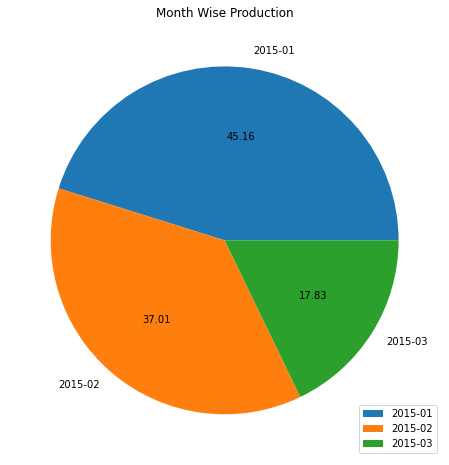

In [178]:
plt.pie(x=month['date'], labels=month['index'], autopct='%.2f')
plt.title('Month Wise Production')
plt.legend()
plt.show()


# Quarter - Wise Distribution

In [179]:
quarter=df['quarter'].value_counts().reset_index()
quarter

,index,quarter
0,Quarter1,358
1,Quarter2,334
2,Quarter4,245
3,Quarter3,209
4,Quarter5,43


In [180]:
line=px.line(quarter, x=quarter['index'], y=quarter['quarter'], title='Quarter Distribution')
line.show()

# Department Frequency Distribution

In [181]:
dep=df['department'].value_counts().reset_index()
dep

,index,department
0,sweing,694
1,finishing,495


No handles with labels found to put in legend.


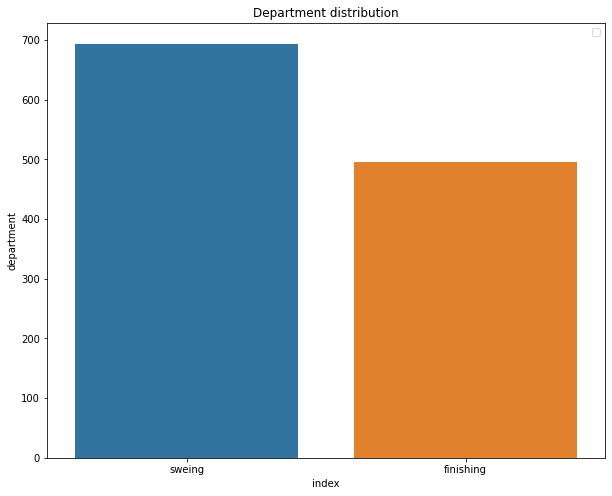

In [182]:
sns.barplot(x=dep['index'],y=dep['department'])
plt.title('Department distribution')
plt.legend()
plt.show()

# Department - Wise Target Productivity Distribution

In [183]:
prod=df.groupby('department')['targeted_productivity'].sum().to_frame().reset_index()
prod

,department,targeted_productivity
0,finishing,373.550
1,sweing,520.775


In [184]:
fun=px.funnel(prod, x='department', y='targeted_productivity')
fun.show()

# Bar Chart Representation of Team Wise mean targeted productivity

In [185]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,total_work,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,pending,prop_job_remaining,Actual_workers
0,2015-01,Quarter1,sweing,Thursday,8,0.80,0.436000,19876.0,1108.0,118.0,98,0.0,0,No,59,0.940725,18768.0,0.944254,59
1,2015-01,Quarter1,finishing,Thursday,1,0.75,0.065667,21791.0,1039.0,16.0,0,0.0,0,No,8,0.886500,20752.0,0.952320,8
2,2015-01,Quarter1,sweing,Thursday,11,0.80,0.190167,5513.0,968.0,61.0,50,0.0,0,No,31,0.800570,4545.0,0.824415,31
3,2015-01,Quarter1,sweing,Thursday,12,0.80,0.190167,23582.0,968.0,61.0,50,0.0,0,No,31,0.800570,22614.0,0.958952,31
4,2015-01,Quarter1,sweing,Thursday,6,0.80,0.431667,13469.0,1170.0,32.0,50,0.0,0,No,56,0.800382,12299.0,0.913134,56


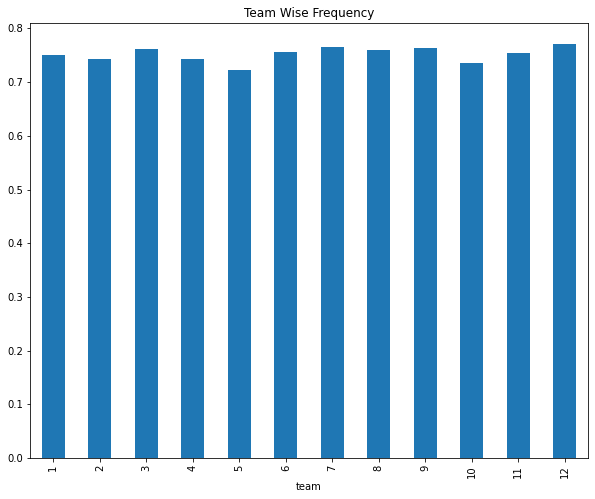

In [186]:
plt.title('Team Wise Frequency')
df.groupby('team')['targeted_productivity'].mean().plot(kind = 'bar')
plt.show()

# Average overtime based on team and department

In [187]:
b2=df.groupby(['team','department'])['over_time'].mean().reset_index()
b2

,team,department,over_time
0,1,finishing,31.469388
1,1,sweing,122.258929
2,2,finishing,33.313725
3,2,sweing,106.758621
4,3,finishing,45.121212
5,3,sweing,114.279661
6,4,finishing,45.978261
7,4,sweing,124.254237
8,5,finishing,35.257143
9,5,sweing,121.189655


In [188]:
over=px.bar(b2, x='team', y='over_time', color='department', title='Average overtime based on team and department')
over.show()

In [189]:
over=px.bar(b2, x='team', y='over_time', color='department', barmode='group',text='department',title='Average overtime based on team and department')
over.show()

# Removing columns

In [190]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,total_work,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,pending,prop_job_remaining,Actual_workers
0,2015-01,Quarter1,sweing,Thursday,8,0.80,0.436000,19876.0,1108.0,118.0,98,0.0,0,No,59,0.940725,18768.0,0.944254,59
1,2015-01,Quarter1,finishing,Thursday,1,0.75,0.065667,21791.0,1039.0,16.0,0,0.0,0,No,8,0.886500,20752.0,0.952320,8
2,2015-01,Quarter1,sweing,Thursday,11,0.80,0.190167,5513.0,968.0,61.0,50,0.0,0,No,31,0.800570,4545.0,0.824415,31
3,2015-01,Quarter1,sweing,Thursday,12,0.80,0.190167,23582.0,968.0,61.0,50,0.0,0,No,31,0.800570,22614.0,0.958952,31
4,2015-01,Quarter1,sweing,Thursday,6,0.80,0.431667,13469.0,1170.0,32.0,50,0.0,0,No,56,0.800382,12299.0,0.913134,56


In [191]:
df=df.drop(['total_work','wip', 'idle_men', 'idle_time'], axis=1) 

In [192]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,pending,prop_job_remaining,Actual_workers
0,2015-01,Quarter1,sweing,Thursday,8,0.80,0.436000,118.0,98,No,59,0.940725,18768.0,0.944254,59
1,2015-01,Quarter1,finishing,Thursday,1,0.75,0.065667,16.0,0,No,8,0.886500,20752.0,0.952320,8
2,2015-01,Quarter1,sweing,Thursday,11,0.80,0.190167,61.0,50,No,31,0.800570,4545.0,0.824415,31
3,2015-01,Quarter1,sweing,Thursday,12,0.80,0.190167,61.0,50,No,31,0.800570,22614.0,0.958952,31
4,2015-01,Quarter1,sweing,Thursday,6,0.80,0.431667,32.0,50,No,56,0.800382,12299.0,0.913134,56


# **Categorical Encoding**

In [193]:
df=pd.get_dummies(df, columns = [	'department',	'day', 'no_of_style_change'], drop_first=True)

In [194]:
df.head()

,date,quarter,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,pending,prop_job_remaining,Actual_workers,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,no_of_style_change_Yes
0,2015-01,Quarter1,8,0.80,0.436000,118.0,98,59,0.940725,18768.0,0.944254,59,1,0,0,1,0,0,0
1,2015-01,Quarter1,1,0.75,0.065667,16.0,0,8,0.886500,20752.0,0.952320,8,0,0,0,1,0,0,0
2,2015-01,Quarter1,11,0.80,0.190167,61.0,50,31,0.800570,4545.0,0.824415,31,1,0,0,1,0,0,0
3,2015-01,Quarter1,12,0.80,0.190167,61.0,50,31,0.800570,22614.0,0.958952,31,1,0,0,1,0,0,0
4,2015-01,Quarter1,6,0.80,0.431667,32.0,50,56,0.800382,12299.0,0.913134,56,1,0,0,1,0,0,0


# **Removing Multicollinearity using Variance Inflation Factor**

In [195]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:

X = df[['targeted_productivity', 'smv', 'over_time', 'incentive','no_of_workers', 'pending', 'prop_job_remaining', 'Actual_workers']]


vif=pd.DataFrame()
vif['feature']=X.columns


vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

vif 
# we can observe that 'no_of_workers' and 'Actual_workers' are highly correlated, hence we will remove one variable and check for VIF again


,feature,VIF
0,targeted_productivity,6.375819
1,smv,17.518245
2,over_time,6.499921
3,incentive,2.918621
4,no_of_workers,inf
5,pending,3.912703
6,prop_job_remaining,1.107381
7,Actual_workers,inf


In [197]:
X = df[['targeted_productivity', 'smv', 'over_time', 'incentive', 'pending', 'prop_job_remaining', 'Actual_workers']]


vif=pd.DataFrame()
vif['feature']=X.columns


vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

vif 

,feature,VIF
0,targeted_productivity,6.375819
1,smv,17.518245
2,over_time,6.499921
3,incentive,2.918621
4,pending,3.912703
5,prop_job_remaining,1.107381
6,Actual_workers,27.774483


In [198]:
X = df[['targeted_productivity', 'smv', 'over_time', 'incentive', 'pending', 'prop_job_remaining']]


vif=pd.DataFrame()
vif['feature']=X.columns


vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

vif  #All the vif values are less than 10, hence we will consider these variables

,feature,VIF
0,targeted_productivity,6.090630
1,smv,6.120233
2,over_time,5.656488
3,incentive,2.533201
4,pending,3.912527
5,prop_job_remaining,1.107189


In [199]:
df=df.drop(['date','quarter','no_of_workers', 'Actual_workers'], axis=1)

# **Splitting the data**

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X=df.drop(['actual_productivity'], axis=1)
y=df['actual_productivity']

In [202]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.25)

# **Data Scaling**

In [203]:
df.head()

,team,targeted_productivity,smv,over_time,incentive,actual_productivity,pending,prop_job_remaining,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,no_of_style_change_Yes
0,8,0.80,0.436000,118.0,98,0.940725,18768.0,0.944254,1,0,0,1,0,0,0
1,1,0.75,0.065667,16.0,0,0.886500,20752.0,0.952320,0,0,0,1,0,0,0
2,11,0.80,0.190167,61.0,50,0.800570,4545.0,0.824415,1,0,0,1,0,0,0
3,12,0.80,0.190167,61.0,50,0.800570,22614.0,0.958952,1,0,0,1,0,0,0
4,6,0.80,0.431667,32.0,50,0.800382,12299.0,0.913134,1,0,0,1,0,0,0


In [204]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
sc=MinMaxScaler()

In [206]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# **Model Building**

# Linear Regression

In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
lr=LinearRegression()

In [209]:
lr.fit(X_train,y_train)

LinearRegression()

In [210]:
lr.score(X_train,y_train)

0.2873819252029959

In [211]:
lr_pred=lr.predict(X_test)

In [212]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [213]:
errors = y_test-lr_pred
sse= np.square(errors).sum()

mae=mean_absolute_error(y_test,lr_pred)

rmse=mean_squared_error(y_test,lr_pred)

r2=r2_score(y_test,lr_pred)

adjr2= 1- ((1-r2) * (X.shape[0]-1) / (X.shape[0] - X.shape[1] - 1))

print('Sum of Squared Errors: ', sse, '\nMean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2, '\nAdjusted R2: ', adjr2)

Sum of Squared Errors:  6.010794880155684 
Mean absolute error:  0.10594394628965093 
Root Mean Squared Error:  0.020170452617972096 
R2 score:  0.34680057207083137 
Adjusted R2:  0.3390111410733796


# Ridge

In [214]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [215]:
rid=Ridge()

In [216]:
rid.fit(X_train,y_train)

Ridge()

In [217]:
rid.score(X_train,y_train)

0.28702098689224687

In [218]:
params={'alpha':[0.01,0.001,0.002,0.003,0.04,0.04,0.5,1,2,3,10,50,100]}

In [219]:
tune_rid=GridSearchCV(rid, params, scoring='neg_mean_squared_error', cv=3, verbose=3)

In [220]:
tune_rid.fit(X_train,y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits
[CV 1/3] END .......................alpha=0.01;, score=-0.025 total time=   0.0s
[CV 2/3] END .......................alpha=0.01;, score=-0.020 total time=   0.0s
[CV 3/3] END .......................alpha=0.01;, score=-0.030 total time=   0.0s
[CV 1/3] END ......................alpha=0.001;, score=-0.025 total time=   0.0s
[CV 2/3] END ......................alpha=0.001;, score=-0.020 total time=   0.0s
[CV 3/3] END ......................alpha=0.001;, score=-0.043 total time=   0.0s
[CV 1/3] END ......................alpha=0.002;, score=-0.025 total time=   0.0s
[CV 2/3] END ......................alpha=0.002;, score=-0.020 total time=   0.0s
[CV 3/3] END ......................alpha=0.002;, score=-0.040 total time=   0.0s
[CV 1/3] END ......................alpha=0.003;, score=-0.025 total time=   0.0s
[CV 2/3] END ......................alpha=0.003;, score=-0.020 total time=   0.0s
[CV 3/3] END ......................alpha=0.003;,

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.001, 0.002, 0.003, 0.04, 0.04, 0.5,
                                   1, 2, 3, 10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [221]:
tune_rid.best_params_

{'alpha': 2}

In [222]:
rid=Ridge(alpha=2)

In [223]:
rid.fit(X_train,y_train)
rid.score(X_train,y_train)

0.2862546671450972

# Lasso

In [224]:
from sklearn.linear_model import Lasso

In [225]:
lass=Lasso()

In [226]:
lass.fit(X_train,y_train)

Lasso()

In [227]:
lass.score(X_train,y_train)

0.0

In [228]:
params={'alpha':[0.01,0.001,0.002,0.003,0.04,0.04,0.5,1,2,3,10,50,100]}

In [229]:
tune_lass=GridSearchCV(lass, params, scoring='neg_mean_squared_error', cv=3, verbose=3)

In [230]:
tune_lass.fit(X_train,y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits
[CV 1/3] END .......................alpha=0.01;, score=-0.033 total time=   0.0s
[CV 2/3] END .......................alpha=0.01;, score=-0.023 total time=   0.0s
[CV 3/3] END .......................alpha=0.01;, score=-0.029 total time=   0.0s
[CV 1/3] END ......................alpha=0.001;, score=-0.026 total time=   0.0s
[CV 2/3] END ......................alpha=0.001;, score=-0.019 total time=   0.0s
[CV 3/3] END ......................alpha=0.001;, score=-0.022 total time=   0.0s
[CV 1/3] END ......................alpha=0.002;, score=-0.027 total time=   0.0s
[CV 2/3] END ......................alpha=0.002;, score=-0.019 total time=   0.0s
[CV 3/3] END ......................alpha=0.002;, score=-0.023 total time=   0.0s
[CV 1/3] END ......................alpha=0.003;, score=-0.027 total time=   0.0s
[CV 2/3] END ......................alpha=0.003;, score=-0.019 total time=   0.0s
[CV 3/3] END ......................alpha=0.003;,

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.001, 0.002, 0.003, 0.04, 0.04, 0.5,
                                   1, 2, 3, 10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [231]:
tune_lass.best_params_

{'alpha': 0.001}

In [232]:
lass=Lasso(alpha=0.001)

In [233]:
lass.fit(X_train,y_train)
lass.score(X_train,y_train)

0.2812885195429329

# SVM

In [234]:
from sklearn.svm import SVR

In [235]:
sv=SVR()

In [236]:
sv.fit(X_train,y_train)

SVR()

In [237]:
sv.score(X_train,y_train)

0.4587453900378071

In [238]:
params={'kernel':['rbf'],
        'gamma':[0.001,0.002,0.01,0.02,0.03,0.5,0.8,0.1,0.8,1,2,3,4,5,10,20,50,100],
        'C':[0.001,0.002,0.01,0.02,0.03,0.5,0.8,0.1,0.8,1,2,3,5,10,20,40,50,100]}

In [239]:
tuned_svr=GridSearchCV(sv, params, scoring='neg_mean_squared_error', verbose=3, cv=3, n_jobs=-1)

In [240]:
tuned_svr.fit(X_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.002, 0.01, 0.02, 0.03, 0.5, 0.8, 0.1,
                               0.8, 1, 2, 3, 5, 10, 20, 40, 50, 100],
                         'gamma': [0.001, 0.002, 0.01, 0.02, 0.03, 0.5, 0.8,
                                   0.1, 0.8, 1, 2, 3, 4, 5, 10, 20, 50, 100],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=3)

In [241]:
tuned_svr.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [242]:
sv=SVR(gamma=0.1, C=1, kernel='rbf')

In [243]:
sv.fit(X_train,y_train)
sv.score(X_train,y_train)

0.3450341684776236

# Decision Tree

In [244]:
from sklearn.tree import DecisionTreeRegressor

In [245]:
dt=DecisionTreeRegressor()

In [246]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [247]:
dt.score(X_train,y_train) #it will lead to overfitting problem, as max depth is 'None'

1.0

In [248]:
params={'max_depth':[1,2,3,5,6,7,8,9,10,11,12,13,14,15],
        'min_samples_split':[1,2,4,5,6,7,8,9,10,11,12,14,16,20,40,50,60,70,80,100],
        'max_leaf_nodes':[None,5,10,20,30,40,50,60,90,100,120]}

In [249]:
tuned_dt=GridSearchCV(dt,params, scoring='neg_mean_squared_error', verbose=3, cv=3, n_jobs=-1)

In [250]:
tuned_dt.fit(X_train,y_train)

Fitting 3 folds for each of 3080 candidates, totalling 9240 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'max_leaf_nodes': [None, 5, 10, 20, 30, 40, 50, 60, 90,
                                            100, 120],
                         'min_samples_split': [1, 2, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 14, 16, 20, 40, 50, 60, 70,
                                               80, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [251]:
tuned_dt.best_params_

{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [266]:
dt=DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10,min_samples_split=2)

In [267]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10)

In [268]:
dt.score(X_train,y_train)

0.41000046075634555

In [269]:
dt_pred=dt.predict(X_test)

In [270]:
errors= y_test-dt_pred
sse=np.square(errors).sum()

mae=mean_absolute_error(y_test,dt_pred)

mse=mean_squared_error(y_test,dt_pred)

r2=r2_score(y_test,dt_pred)

adjr2= 1- ((1-r2) * (X.shape[0]-1) / (X.shape[0] - X.shape[1] - 1))

print('Sum of Squared Errors: ', sse, '\nMean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2, '\nAdjusted R2: ', adjr2)

Sum of Squared Errors:  5.859521621978417 
Mean absolute error:  0.10263854508731764 
Root Mean Squared Error:  0.020170452617972096 
R2 score:  0.3632395968042478 
Adjusted R2:  0.3556462018768709


# **Random Forest**

In [271]:
from sklearn.ensemble import RandomForestRegressor

In [272]:
rf=RandomForestRegressor()

In [273]:
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9151594477617545

In [274]:
rf_pred=rf.predict(X_test)

In [275]:
errors= y_test-rf_pred
sse=np.square(errors).sum()

mae=mean_absolute_error(y_test,rf_pred)

mse=mean_squared_error(y_test,rf_pred)

r2=r2_score(y_test,rf_pred)

adjr2= 1- ((1-r2) * (X.shape[0]-1) / (X.shape[0] - X.shape[1] - 1))

print('Sum of Squared Errors: ', sse, '\nMean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2, '\nAdjusted R2: ', adjr2)

Sum of Squared Errors:  5.585127232968154 
Mean absolute error:  0.09047577129352354 
Root Mean Squared Error:  0.020170452617972096 
R2 score:  0.3930583248597018 
Adjusted R2:  0.38582051953434904


# This again is an overfitting problem

In [276]:
params={'max_depth':[1,2,3,5,6,7,8,9,10,11,12,13,14,15],
        'min_samples_split':[1,2,4,5,6,7,8,9,10,11,12,14,16,20,40,50,60,70,80,100],
        'max_leaf_nodes':[None,5,6,7,8,9,10,11,12,36,20,30,40,50,60,90,100,120],
        'n_estimators':[100]}

In [277]:
from sklearn.model_selection import RandomizedSearchCV

In [278]:
tuned_rf=RandomizedSearchCV(rf, params, scoring='neg_mean_squared_error', verbose=3, cv=4, n_jobs=-1, n_iter=500)

In [279]:
tuned_rf.fit(X_train,y_train)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_leaf_nodes': [None, 5, 6, 7, 8, 9,
                                                           10, 11, 12, 36, 20,
                                                           30, 40, 50, 60, 90,
                                                           100, 120],
                                        'min_samples_split': [1, 2, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              14, 16, 20, 40,
                                                              50, 60, 70, 80,
                                                              100],
                                        'n_estima

In [280]:
tuned_rf.best_params_

{'max_depth': 15,
 'max_leaf_nodes': 120,
 'min_samples_split': 16,
 'n_estimators': 100}

In [281]:
params={'max_depth':[10,12,15,17,19],
        'min_samples_split':[10,12,14,16,18,20],
        'max_leaf_nodes':[90,100,120,140,160],
        'n_estimators':[100]}

In [282]:
tuned_rf=GridSearchCV(rf, params, scoring='neg_mean_squared_error', verbose=3, cv=4, n_jobs=-1)

In [283]:
tuned_rf.fit(X_train,y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15, 17, 19],
                         'max_leaf_nodes': [90, 100, 120, 140, 160],
                         'min_samples_split': [10, 12, 14, 16, 18, 20],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=3)

In [284]:
tuned_rf.best_params_

{'max_depth': 12,
 'max_leaf_nodes': 140,
 'min_samples_split': 20,
 'n_estimators': 100}

In [285]:
rf=RandomForestRegressor(max_depth=12,max_leaf_nodes=140,min_samples_split=20,n_estimators=100)

In [286]:
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.6445504414876724

In [287]:
rf_pred=rf.predict(X_test)

In [288]:
errors= y_test-rf_pred
sse=np.square(errors).sum()

mae=mean_absolute_error(y_test,rf_pred)

mse=mean_squared_error(y_test,rf_pred)

r2=r2_score(y_test,rf_pred)

adjr2= 1- ((1-r2) * (X.shape[0]-1) / (X.shape[0] - X.shape[1] - 1))

print('Sum of Squared Errors: ', sse, '\nMean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2, '\nAdjusted R2: ', adjr2)

Sum of Squared Errors:  5.087544485748752 
Mean absolute error:  0.08892075421703559 
Root Mean Squared Error:  0.020170452617972096 
R2 score:  0.4471311675221883 
Adjusted R2:  0.44053818314851756
